# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [25]:
import pandas as pd
import numpy as np
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import io
from google.colab import files
#i tried my best but am only able to make upload file work all other ways were not working on google colab even though credit card file is big it take 10 min to upload
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [26]:
car_price_predicton_train = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

car_price_predicton_train.head()
car_price_predicton_train.shape

(205, 26)

In [27]:
 car_price_predicton_train.values

array([[1, 3, 'alfa-romero giulia', ..., 21, 27, 13495.0],
       [2, 3, 'alfa-romero stelvio', ..., 21, 27, 16500.0],
       [3, 1, 'alfa-romero Quadrifoglio', ..., 19, 26, 16500.0],
       ...,
       [203, -1, 'volvo 244dl', ..., 18, 23, 21485.0],
       [204, -1, 'volvo 246', ..., 26, 27, 22470.0],
       [205, -1, 'volvo 264gl', ..., 19, 25, 22625.0]], dtype=object)

In [28]:

car_price_predicton_train.values

array([[1, 3, 'alfa-romero giulia', ..., 21, 27, 13495.0],
       [2, 3, 'alfa-romero stelvio', ..., 21, 27, 16500.0],
       [3, 1, 'alfa-romero Quadrifoglio', ..., 19, 26, 16500.0],
       ...,
       [203, -1, 'volvo 244dl', ..., 18, 23, 21485.0],
       [204, -1, 'volvo 246', ..., 26, 27, 22470.0],
       [205, -1, 'volvo 264gl', ..., 19, 25, 22625.0]], dtype=object)

In [29]:
car_price_predicton_train.isnull().sum()
#no Missing value so we are not filling anything

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
car_price_predicton_train['fueltype'] = labelencoder.fit_transform(car_price_predicton_train['fueltype'])
car_price_predicton_train['aspiration'] = labelencoder.fit_transform(car_price_predicton_train['aspiration'])
car_price_predicton_train['carbody'] = labelencoder.fit_transform(car_price_predicton_train['carbody'])
car_price_predicton_train['drivewheel'] = labelencoder.fit_transform(car_price_predicton_train['drivewheel'])
car_price_predicton_train['enginelocation'] = labelencoder.fit_transform(car_price_predicton_train['enginelocation'])
car_price_predicton_train['fuelsystem'] = labelencoder.fit_transform(car_price_predicton_train['enginelocation'])
car_price_predicton_train['doornumber'] = car_price_predicton_train['doornumber'].map({'two':2,'four':4})

In [31]:
data1 = car_price_predicton_train[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation'] ]
print(data1.shape)
data1.values

(205, 10)


array([[  111.  ,     3.47,   130.  , ...,     2.  , 13495.  ,     0.  ],
       [  111.  ,     3.47,   130.  , ...,     2.  , 16500.  ,     0.  ],
       [  154.  ,     2.68,   152.  , ...,     2.  , 16500.  ,     0.  ],
       ...,
       [  134.  ,     3.58,   173.  , ...,     2.  , 21485.  ,     0.  ],
       [  106.  ,     3.01,   145.  , ...,     2.  , 22470.  ,     0.  ],
       [  114.  ,     3.78,   141.  , ...,     2.  , 22625.  ,     0.  ]])

In [32]:

x = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])
train_ratio = 0.5
validation_ratio = 0.20
test_ratio = 0.30
from sklearn.model_selection import train_test_split
# train is now 50% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
print("train")
print(x_train)
print("test")
print(x_test)
print("validation")
print( x_val )

#x_train = x_train.astype(np.float32)
#y_train = y_train.astype(np.float32)


train
     horsepower  boreratio  enginesize  ...  wheelbase  drivewheel  enginelocation
165         112       3.24          98  ...       94.5           2               0
62           84       3.39         122  ...       98.8           1               0
53           68       3.03          91  ...       93.1           1               0
1           111       3.47         130  ...       88.6           2               0
145         111       3.62         108  ...       97.0           0               0
..          ...        ...         ...  ...        ...         ...             ...
131          90       3.46         132  ...       96.1           1               0
115          97       3.46         120  ...      107.9           2               0
58          135       3.33          80  ...       95.3           2               0
151          62       3.05          92  ...       95.7           1               0
99           97       3.33         120  ...       97.2           1               

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
                          input_shape =(9,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [53]:
model=build_model()

In [54]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_val, y_val))

Epoch 1/100
4/4 [==============================] - 1s 62ms/step - loss: 282692780.8000 - mae: 14570.6895 - val_loss: 155283024.0000 - val_mae: 11035.5410
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 255300435.2000 - mae: 13859.0373 - val_loss: 153802672.0000 - val_mae: 10972.4619
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 249492707.2000 - mae: 13777.6426 - val_loss: 152600240.0000 - val_mae: 10921.0967
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 259903596.8000 - mae: 13972.5773 - val_loss: 151701888.0000 - val_mae: 10882.6270
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 259764204.8000 - mae: 14104.3531 - val_loss: 150801888.0000 - val_mae: 10843.9727
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 303854425.6000 - mae: 14814.8582 - val_loss: 150012896.0000 - val_mae: 10810.7705
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 2560

In [55]:
historyTest=model.fit(x_test,y_test,epochs=100,validation_data=(x_val, y_val))

Epoch 1/100
2/2 [==============================] - 0s 106ms/step - loss: 117568672.0000 - mae: 7928.9849 - val_loss: 54489568.0000 - val_mae: 5359.2681
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 116272064.0000 - mae: 7853.8862 - val_loss: 53664208.0000 - val_mae: 5289.4580
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 114928264.0000 - mae: 7783.5674 - val_loss: 52816616.0000 - val_mae: 5216.8657
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 113583952.0000 - mae: 7711.3560 - val_loss: 51953032.0000 - val_mae: 5141.9282
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 112202640.0000 - mae: 7626.7598 - val_loss: 51116200.0000 - val_mae: 5068.3325
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 110862160.0000 - mae: 7548.2852 - val_loss: 50281436.0000 - val_mae: 4993.9199
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 109495264.0000 - mae:

In [56]:
# evaluate the keras model
# evaluate the model
scores = model.evaluate(x_train, y_train)
print( (model.metrics_names[1], scores[1]))
# evaluate the model
scores = model.evaluate(x_test, y_test)
print(  (model.metrics_names[1], scores[1]))

4/4 [==============================] - 0s 2ms/step - loss: 34995764.0000 - mae: 4329.1929
('mae', 4329.19287109375)
2/2 [==============================] - 0s 5ms/step - loss: 38234676.0000 - mae: 4655.5410
('mae', 4655.541015625)


In [57]:
y_pred = model.predict(x_train)
print(y_pred)

[[12688.925]
 [13444.866]
 [10926.711]
 [14190.928]
 [13969.137]
 [16921.014]
 [10555.874]
 [14094.809]
 [11368.13 ]
 [17599.414]
 [10308.934]
 [15165.141]
 [13262.754]
 [10902.857]
 [18095.38 ]
 [12267.636]
 [16928.195]
 [12511.188]
 [13440.168]
 [13521.376]
 [12713.487]
 [12680.398]
 [11025.406]
 [ 9676.82 ]
 [10775.476]
 [12633.678]
 [22505.479]
 [14684.9  ]
 [11283.514]
 [15664.812]
 [15814.061]
 [16653.281]
 [20709.188]
 [11862.298]
 [16272.577]
 [13442.952]
 [15445.676]
 [16804.383]
 [20391.072]
 [12592.466]
 [12431.387]
 [17555.734]
 [12376.848]
 [11858.003]
 [14969.812]
 [17326.541]
 [14035.14 ]
 [13379.791]
 [16857.305]
 [10561.249]
 [14217.021]
 [15126.278]
 [16155.142]
 [17492.283]
 [15659.248]
 [12781.522]
 [13440.168]
 [10781.739]
 [11353.303]
 [13216.159]
 [11077.031]
 [16288.448]
 [16376.208]
 [12907.03 ]
 [18868.889]
 [10734.395]
 [14190.928]
 [18276.8  ]
 [16951.145]
 [15291.149]
 [13379.791]
 [13272.575]
 [13565.733]
 [17715.865]
 [16777.418]
 [17095.305]
 [13653.095]

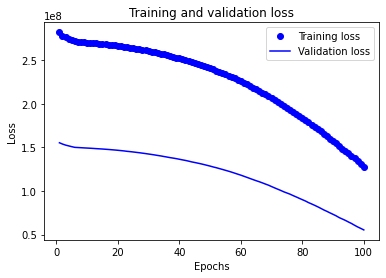

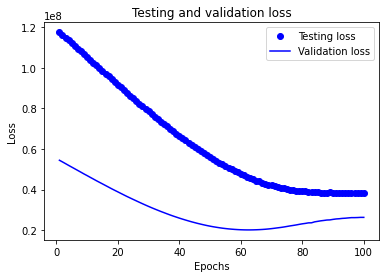

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (100) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
import matplotlib.pyplot as plt
history_dict = historyTest.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (100) + 1)
plt.plot(epochs, loss_values, 'bo', label='Testing loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Testing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

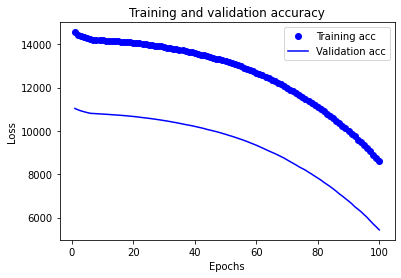

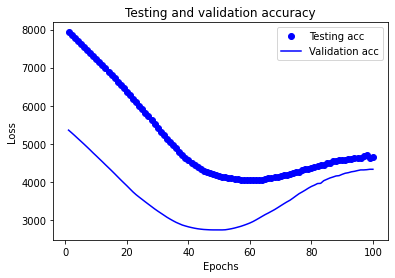

In [59]:
#Plotting the training and validation accuracy
plt.clf()
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Plotting the Testing and validation accuracy
plt.clf()
acc = historyTest.history['mae']
val_acc = historyTest.history['val_mae']
plt.plot(epochs, acc, 'bo', label='Testing acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Testing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()